In [1]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import numpy as np
import pandas as pd
import pickle
import ieeg_funcs as ief
import dgFuncs as dg
import matplotlib.pyplot as plt
%matplotlib inline
import imp 
import mtspec

In [2]:
npz=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/plvSeSvmDsamp500TestFullNoEnsemble_2/classify_metrics_srch.npz')

In [7]:
print(npz.keys())
print('nsvec {}'.format(npz['nsvec']))
print('train_bacc {}'.format(npz['train_bacc']))
print('train_subs_list {}'.format(npz['train_subs_list']))

['train_sens', 'train_spec', 'train_bacc', 'train_subs_list', 'nsvec', 'C', 'gam', 'ftr_types']
nsvec 321
train_bacc 0.8314662066105911
train_subs_list [1077 1096  970  253  565  590  620  958]


In [14]:
npz_tr=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/plvSeSvmDsamp500TestFullNoEnsemble_2/apply_models_to_subsamp_train.npz')
print(npz_tr.keys())
print(npz_tr['bacc_by_sub'])
npz_te=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/plvSeSvmDsamp500TestFullNoEnsemble_2/apply_models_to_subsamp_test.npz')
print(npz_te.keys())
print(npz_te['bacc_by_sub'])

['subs', 'n_models', 'bacc_by_sub', 'spec_by_sub', 'sens_by_sub', 'auc_by_sub']
[0.87942033 0.79406005 0.82215394 0.8429661  0.73007788 0.85907811
 0.80978982 0.81566893]
['subs', 'n_models', 'bacc_by_sub', 'spec_by_sub', 'sens_by_sub', 'auc_by_sub']
[0.83350809 0.83288427 0.83191283 0.80049993]


In [18]:
import statsmodels.stats.api as sms
bro=sms.DescrStatsW(npz_tr['bacc_by_sub']).tconfint_mean()
print(bro)

(0.7811466534475112, 0.857157137817259)


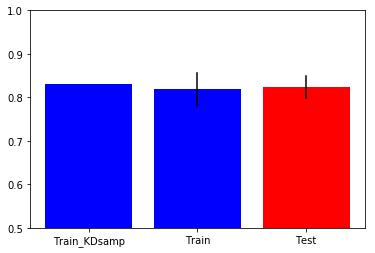

In [40]:
#plt.figure()
#ax=plt.subplots(1,1,1)
fig, ax = plt.subplots()
plt.clf()
x=np.arange(0,2)
y=np.zeros(2)
y[0]=npz['train_bacc']
y[1]=np.mean(npz_tr['bacc_by_sub'])
y_test=np.mean(npz_te['bacc_by_sub'])
plt.bar(x,y,color='b')
#se=np.std(npz_tr['bacc_by_sub'])/np.sqrt(len(npz_tr['bacc_by_sub']))
ct_tr=sms.DescrStatsW(npz_tr['bacc_by_sub']).tconfint_mean()
plt.plot([1, 1],ct_tr,'k-')
plt.bar(2,y_test,color='r')
ct_te=sms.DescrStatsW(npz_te['bacc_by_sub']).tconfint_mean()
plt.plot([2, 2],ct_te,'k-')
plt.ylim([0.5, 1])
plt.xticks([0, 1, 2],['Train_KDsamp','Train','Test'])
ax.yaxis.grid(color='k')

In [8]:
# import mat file
in_fname='/Users/davidgroppe/Downloads/clips/Patient_1/Patient_1_ictal_segment_1.mat'
mat=sio.loadmat(in_fname)
print(mat.keys())
print(mat['data'].shape)
print(mat['freq'])

# perform FT

dict_keys(['latency', 'data', 'channels', '__version__', 'freq', '__globals__', '__header__'])
(68, 500)
[ 499.906994]


<Container object of 2 artists>

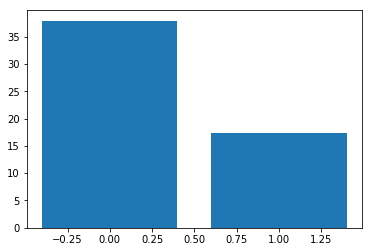

In [3]:
szr_red=[37.9, 17.3]
plt.figure(1)
plt.bar([0,1],szr_red)

In [30]:
def dft_all_chans(eeg,dlt):
    # dlt=1/srate
    [n_chan, n_tpt]=eeg.shape
    for c in range(n_chan):
        [temp_spc, freqs]=mtspec.multitaper.mtspec(mat['data'][c,:],dlt,3)
        if c==0:
            n_freq=len(freqs)
            spc=np.zeros((n_chan, n_freq))
        spc[c,:]=temp_spc
    return spc, freqs

In [9]:
[spc, freqs]=mtspec.multitaper.mtspec(mat['data'][0,:],1/500,2)

(16, 5000)
[ 5000.]


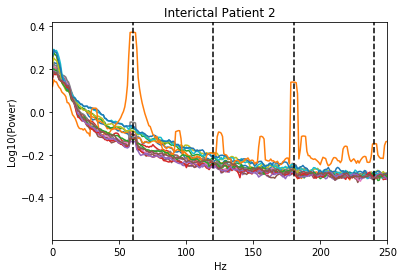

In [52]:
n_file=100
sub_id=2
for a in range(10):
    in_fname='/Users/davidgroppe/Downloads/clips/Patient_'+str(sub_id)+'/Patient_'+str(sub_id)+'_interictal_segment_'+str(a+1)+'.mat'
    mat=sio.loadmat(in_fname)
    [spc, freqs]=dft_all_chans(mat['data'],1/mat['freq'])
    if a==0:
        grand_spc=np.log10(spc)
    else:
        grand_spc+=np.log10(spc)
grand_spc=grand_spc/n_file
print(mat['data'].shape)
print(mat['freq'])

plt.figure(1)
plt.clf()
plt.plot(freqs,grand_spc.T);
ylim=plt.ylim()
for f in range(60,int(freqs[-1]),60):
    plt.plot([f, f],ylim,'k--')
plt.ylim(ylim)
plt.xlim([0, 250])
#plt.xlim([freqs[0], freqs[-1]])
plt.xlabel('Hz')
plt.ylabel('Log10(Power)')
plt.title('Interictal Patient '+str(sub_id))

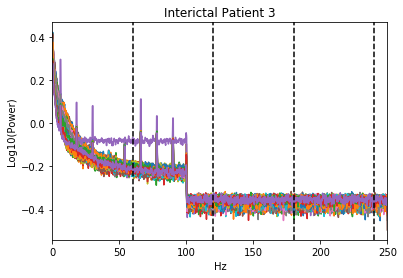

In [45]:
plt.figure(1)
plt.clf()
plt.plot(freqs,grand_spc.T);
ylim=plt.ylim()
for f in range(60,250,60):
    plt.plot([f, f],ylim,'k--')
plt.ylim(ylim)
plt.xlim([freqs[0], freqs[-1]])
plt.xlabel('Hz')
plt.ylabel('Log10(Power)')
plt.title('Interictal Patient '+str(sub_id))

# plt.figure(2)
# plt.clf()
# plt.plot(freqs,np.log10(spc.T));

In [4]:
path_dict=ief.get_path_dict()
print(path_dict.keys())
print(path_dict['eu_meta'])
print(path_dict['eu_root'])
print(path_dict['szr_ant_root'])

dict_keys(['eu_meta', 'ieeg_root', 'ftrs_root', 'eu_root', 'szr_ant_root', 'pics', 'eu_gen_ftrs', 'onset_csv'])
/Users/davidgroppe/Dropbox/TWH_INFO/EU_METADATA/
/Users/davidgroppe/ONGOING/EU_EEG/
/Users/davidgroppe/PycharmProjects/SZR_ANT/


In [6]:
sub=864
szr_times_fname = os.path.join(path_dict['szr_ant_root'],'EU_METADATA','SZR_TIMES/',
                                   'szr_on_off_FR_' + str(sub) + '.pkl')
print(szr_times_fname)

/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_864.pkl


In [9]:
yhat_fname='/home/dgroppe/EU_YHAT/862_svmAesFinale_1/86200102_0057_yhat.npz'
yhat=np.load(yhat_fname)
print(yhat.keys())

y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86200102_0057.mat'
y=sio.loadmat(y_fname)
print(y.keys())

['max_yhat', 'yhat_soz_chans', 'yhat_sec']
dict_keys(['__header__', '__version__', '__globals__', 'se_szr_class', 'se_time_sec', 'szr_class_dec', 'time_dec'])


In [17]:
print(yhat['yhat_sec'].shape)
print(y['se_szr_class'].shape)
print(y['se_time_sec'].shape)
print(y['time_dec'].shape)
print(y['szr_class_dec'].shape)

(1, 34259)
(1, 34259)
(1, 35436)
(1, 921600)
(1, 921600)


In [18]:
35436-34259

1177

In [24]:
np.squeeze(y['se_szr_class']).shape
np.squeeze(y['se_time_sec'])[1177:].shape

(34259,)

(2700, 3000)

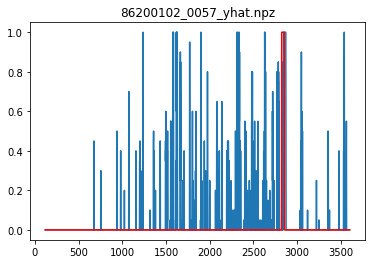

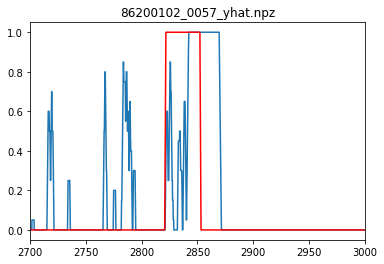

In [27]:
# FIRST SZR
plt.figure(1)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])

#zoom in
plt.figure(2)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])
plt.xlim([2700, 3000])

['max_yhat', 'yhat_soz_chans', 'yhat_sec']
dict_keys(['__header__', '__version__', '__globals__', 'se_szr_class', 'se_time_sec', 'szr_class_dec', 'time_dec'])


(2700, 3000)

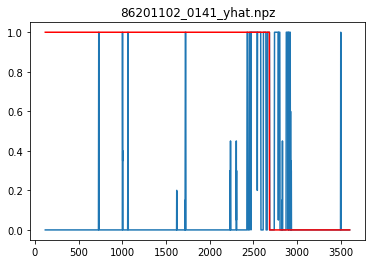

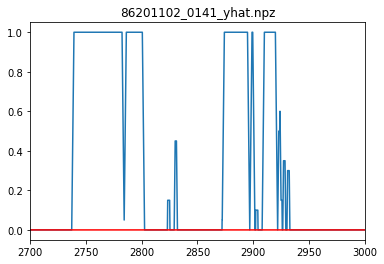

In [28]:
# First szr according to stimulated stim code
yhat_fname='/home/dgroppe/EU_YHAT/862_svmAesFinale_1/86201102_0141_yhat.npz'
yhat=np.load(yhat_fname)
print(yhat.keys())

y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86201102_0141.mat'
y=sio.loadmat(y_fname)
print(y.keys())

plt.figure(1)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])

plt.figure(2)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])
plt.xlim([2700, 3000])

In [41]:
print(np.max(dlt))
print(np.min(dlt))
#dlt=start_sec[1:]-start_sec[0:-1]
print(start_sec[0])
print(start_sec[1])
start_sec[1]-start_sec[0]

0.0
0.0
243362829.0
243366429.0


3600.0

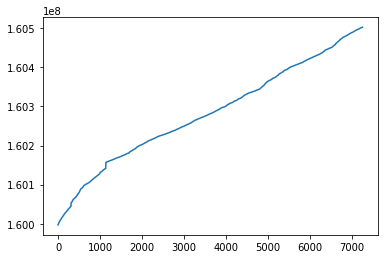

In [105]:
plt.figure(8)
plt.plot(stim_sec)

In [111]:
# Load list of szrs
#sub=862
sub=264
print('Sub=%d' % sub)
szr_times_fname=os.path.join('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/','szr_on_off_FR_'+str(sub)+'.pkl')
szr_df=pickle.load(open(szr_times_fname,'rb'))
# szr_onset=szr_df['SzrOnsetSec']
n_szr=szr_df.shape[0]

# Load stimulation latencies
sbox=np.load('sbox.npz')
sbox.keys()
stim_sec=sbox['stim_sec']

# for szr_id in range(n_szr):
#     onset_sec=szr_df['SzrOnsetSec'][szr_id]
#     offset_sec=szr_df['SzrOffsetSec'][szr_id]
#     print(offset_sec-onset_sec)
    
# Loop over szrs and:


stim_lat=np.zeros(n_szr)
clin_szr=np.zeros(n_szr)
szr_hit=np.zeros(n_szr)
stim_sec_np=np.asarray(stim_sec)
for szr_id in range(n_szr):
    onset_sec=szr_df['SzrOnsetSec'][szr_id]
    offset_sec=szr_df['SzrOffsetSec'][szr_id]
    if szr_df['SzrType'][szr_id]=='Clinical':
        clin_szr[szr_id]=1
    
    # 1) find the stimulation that is closest in time to seizure onset
    nearest_id=dg.find_nearest(stim_sec,onset_sec)
    #nearest_id=dg.find_nearest(stim_sec_np,onset_sec)
    stim_lat[szr_id]=onset_sec-stim_sec[nearest_id]
    
            #         temp_id = np.argmin(np.abs(np.asarray(stim_ids) - onset_id))
        #         closest_id = stim_ids[temp_id]
    
    # 2) see if stimulation happens SOMEwhere in the target window
    #tim_bool=(stim_lat>=onset_sec) and (stim_lat<=offset_sec)
    stim_bool=np.multiply(stim_sec_np>=onset_sec-5,stim_sec_np<=offset_sec)
    if np.sum(stim_bool)>0:
        szr_hit[szr_id]=1
        
    print('Szr %d, lat %f, hit %d, duration=%f' % (szr_id,stim_lat[szr_id],szr_hit[szr_id],offset_sec-onset_sec))
    
print('%d clinical szrs' % np.sum(clin_szr))
print('%d subclinical szrs' % np.sum(clin_szr==0))
print('%d/%d szrs stimulated' % (np.sum(szr_hit),n_szr))

Sub=264
Szr 0, lat -13.343749, hit 1, duration=66.933593
Szr 1, lat 11.511719, hit 1, duration=87.636719
Szr 2, lat -2.074219, hit 1, duration=83.710937
Szr 3, lat -3.769531, hit 1, duration=16.609375
Szr 4, lat 0.195313, hit 1, duration=16.667968
Szr 5, lat -0.539062, hit 1, duration=33.910156
Szr 6, lat 6.230469, hit 1, duration=89.148438
Szr 7, lat 5.394531, hit 1, duration=94.898437
Szr 8, lat -10.062500, hit 1, duration=30.000000
8 clinical szrs
1 subclinical szrs
9/9 szrs stimulated


In [90]:
szr_df.head()

,SozChans,SzrOffsetSec,SzrOffsetStr,SzrOnsetSec,SzrOnsetStr,SzrType
0,[IHB3],2.435673e+08,20.09.2007 01:34:44.667969,2.435673e+08,20.09.2007 01:34:13.148438,Clinical
1,[IHB2],2.440051e+08,25.09.2007 03:12:06.949219,2.440051e+08,25.09.2007 03:10:57.964844,Clinical
2,"[GC7, GC8, GD7, GD8, IHB2, IHB3]",2.440164e+08,25.09.2007 06:19:52.000000,2.440163e+08,25.09.2007 06:18:50.765625,Clinical
3,[],2.440247e+08,25.09.2007 08:37:35.976563,2.440245e+08,25.09.2007 08:35:44.058594,Clinical
4,"[IHB1, IHB2]",2.440265e+08,25.09.2007 09:07:58.457031,2.440264e+08,25.09.2007 09:06:48.359375,Clinical


In [89]:
nearest_id=dg.find_nearest(stim_sec,onset_sec)
print(nearest_id)
print(onset_sec)
print(stim_sec[nearest_id])
print(onset_sec-stim_sec[nearest_id])

3851
244192149.207
244192061.18
88.0273435116


In [2]:
# Load szr on off csv file which has been edited
in_fname='/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.csv'
on_off_df=pd.read_csv(in_fname)

In [6]:
print(on_off_df.shape)
on_off_df.head()

(39, 7)


,Unnamed: 0,SozChans,SzrOffsetSec,SzrOffsetStr,SzrOnsetSec,SzrOnsetStr,SzrType
0,0,['IHD2' 'IHD3' 'IHD4'],2.742349e+08,09.09.2008 00:22:05.941406,2.742349e+08,09.09.2008 00:21:38.150391,Clinical
1,30,[],2.742523e+08,09.09.2008 05:11:43,2.742523e+08,09.09.2008 05:11:19,Subclinical
2,31,[],2.742602e+08,09.09.2008 07:22:50,2.742602e+08,09.09.2008 07:22:33,Subclinical
3,32,[],2.742617e+08,09.09.2008 07:47:51,2.742616e+08,09.09.2008 07:47:21,Subclinical
4,1,[''],2.742726e+08,09.09.2008 10:50:49.858398,2.742726e+08,09.09.2008 10:50:28.400391,Clinical


In [4]:
# output edits to pkl
pickle.dump(on_off_df,open('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.pkl','wb'))

In [5]:
bro=pickle.load(open('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.pkl','rb'))
print(bro.shape)

(39, 7)
